# Name: Vatsal Vinay Parikh

# Binary Classification: Telcom company Customer Churn Classification
## Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

## Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

## Dataset Attributes
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# Loading data

data = pd.read_csv("train.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9313-QOLTZ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.3,No
1,6654-QGBZZ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
2,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
3,8020-BWHYL,Female,1,No,No,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45,Yes
4,3594-IVHJZ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,42.45,No


## Data Analysis
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

**Summarize the data.**
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?

In [ ]:
# How much data is present?
rows, cols = data.shape
print("Number of rows: ", rows, end=" ")
print("\nNumber of columns: ", cols)

Number of rows:  6338 
Number of columns:  21


In [ ]:
# Getting the concise summary about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [ ]:
# Checking what attributes/features are continuous-valued
data.select_dtypes(include=['float64', 'int64']).dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
dtype: object

In [ ]:
# Checking what attributes are categorical
data.select_dtypes(include=['object']).dtypes

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

- **Display the statistical values for each of the attributes, of the distributions for each attribute.**

In [ ]:
# Describing the statistical values for each attributes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,6338.0,0.161723,0.368226,0.00,0.00,0.0,0.0,1.00
tenure,6338.0,32.358630,24.537141,0.00,9.00,29.0,55.0,72.00
MonthlyCharges,6338.0,64.693760,30.140955,18.25,35.45,70.3,89.9,118.75


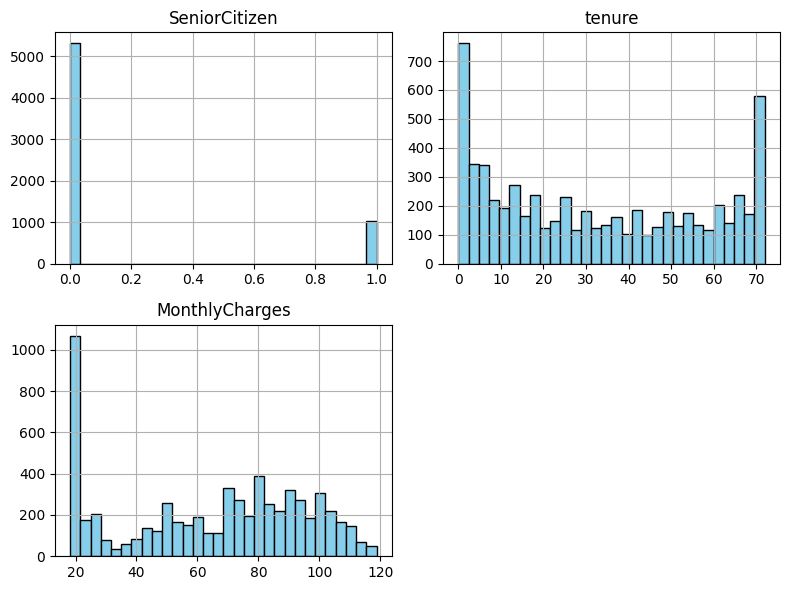

In [ ]:
# Plotting histogram for numerical attributes
data.hist(figsize=(8, 6),  bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

From the histogram above it could be inferred that the 'Senior Citizen' column is actually a categorical attribute and would need to be converted to the same.

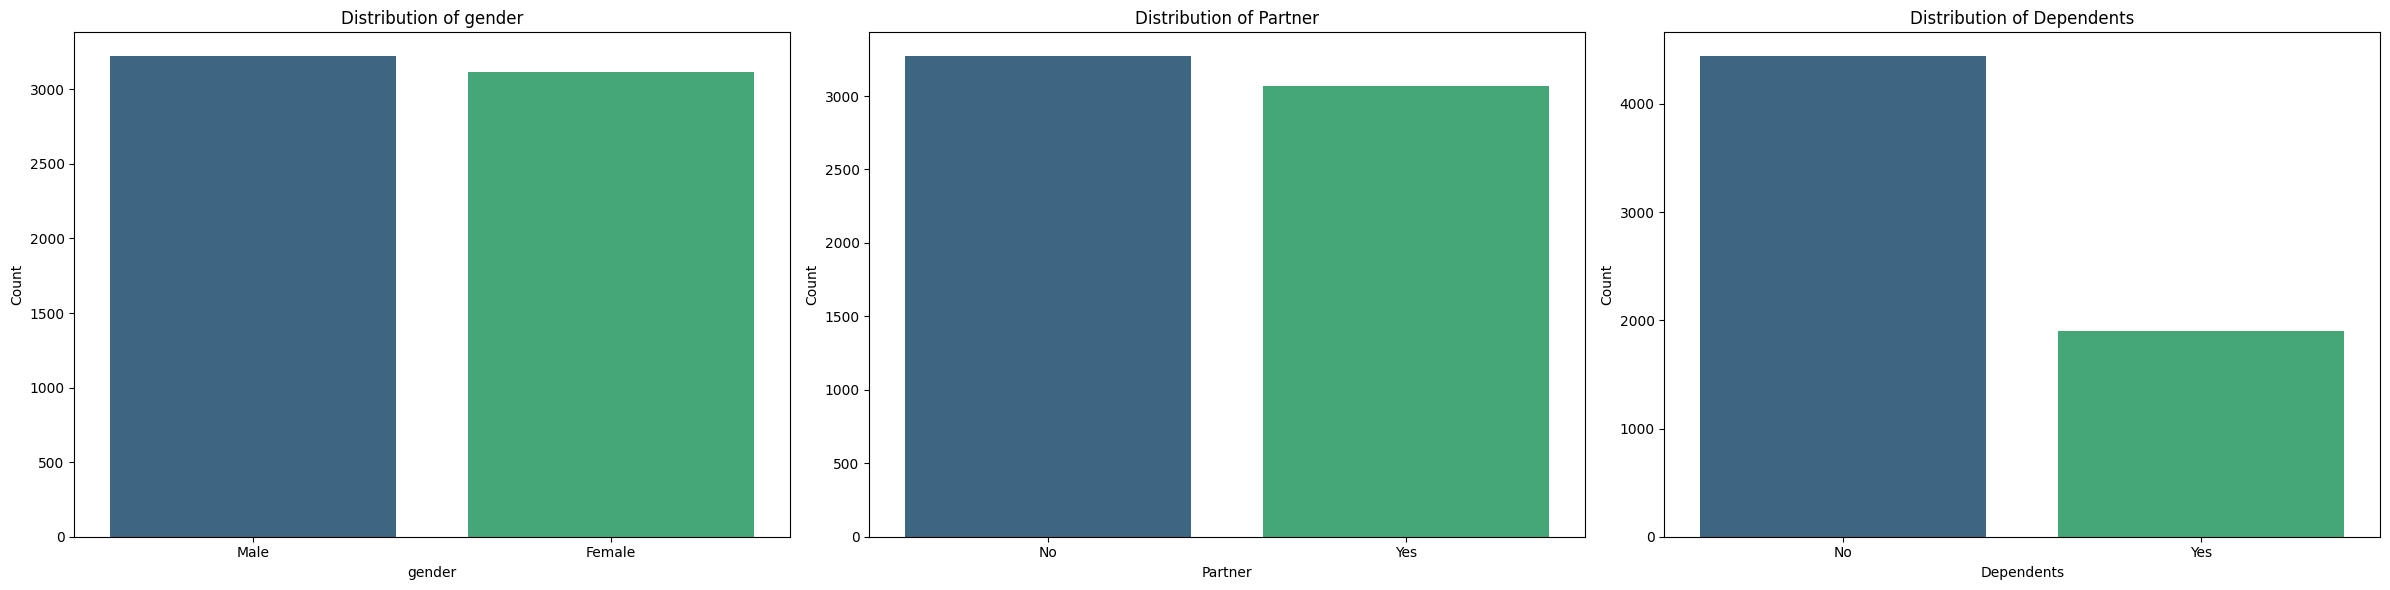

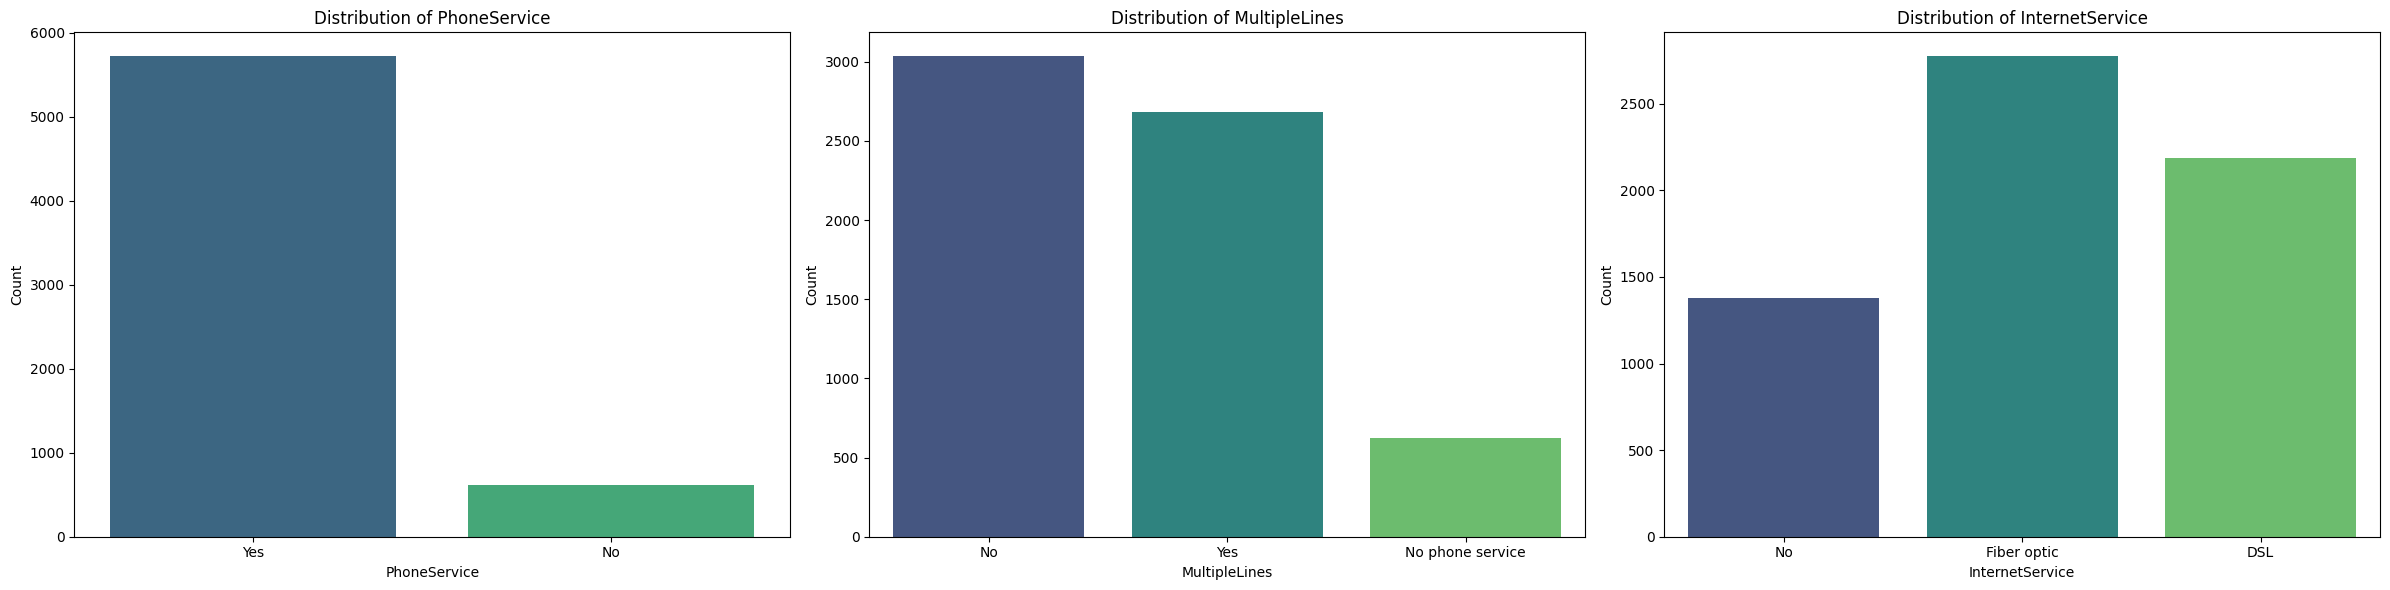

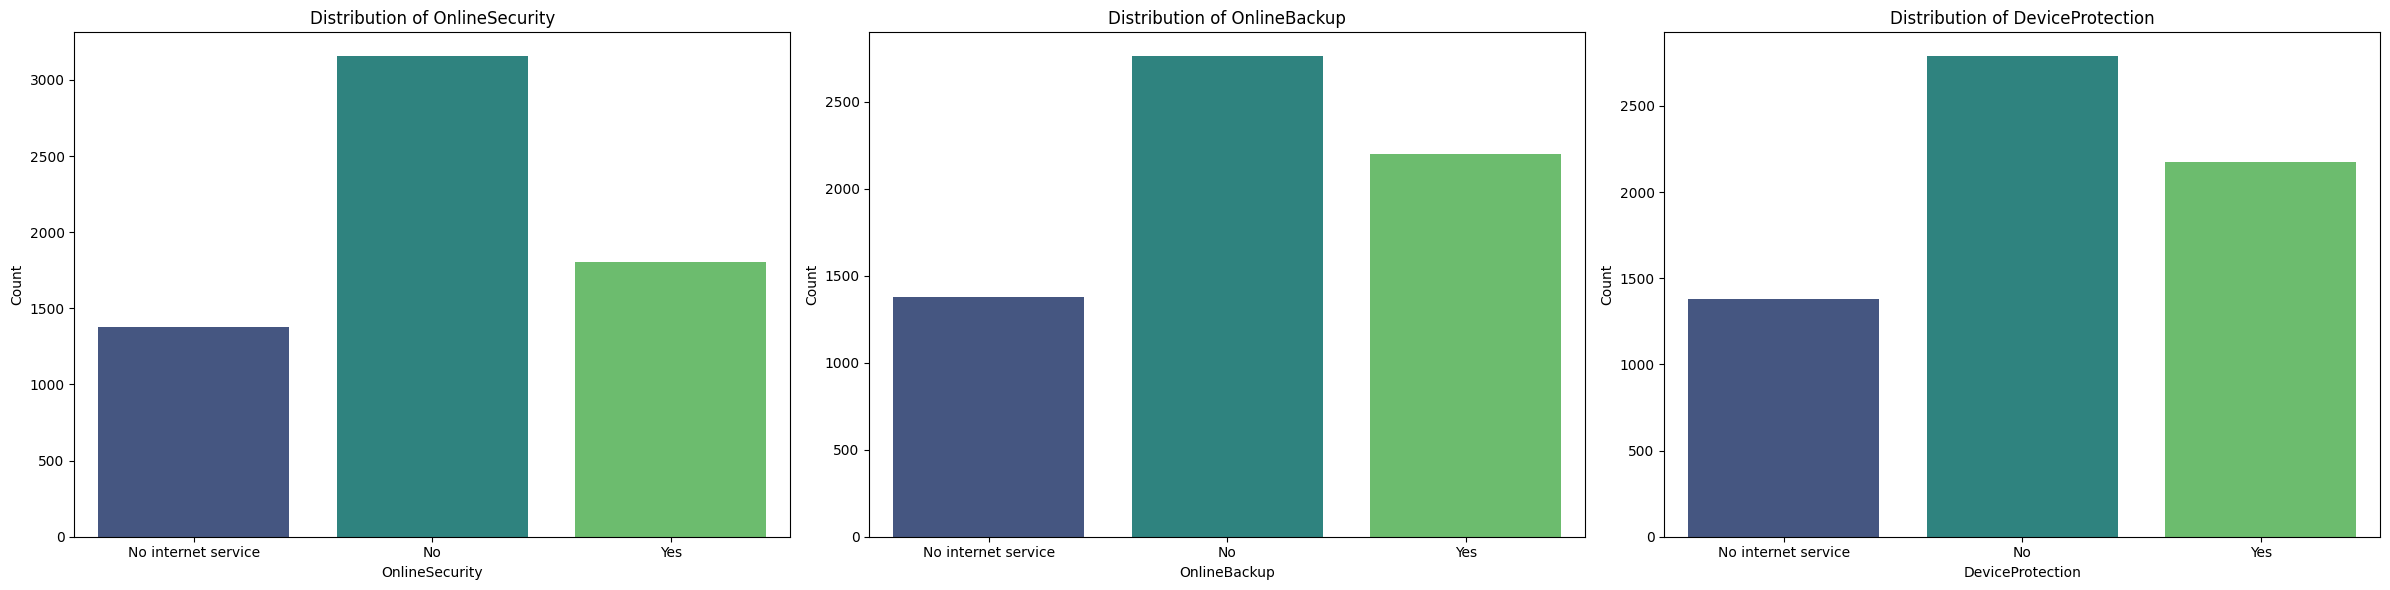

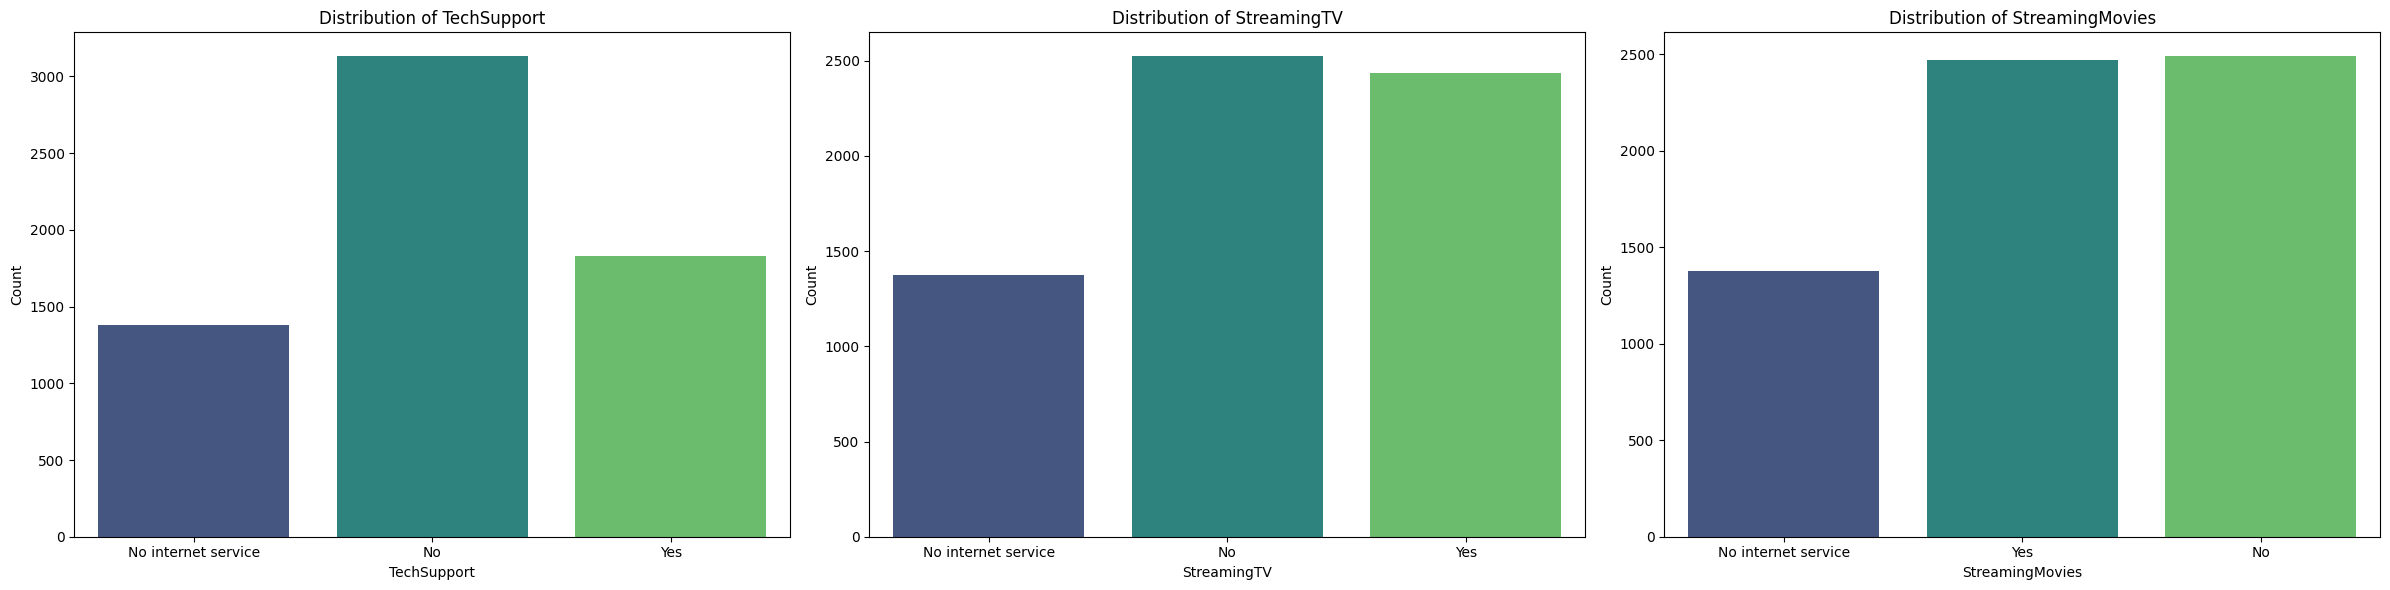

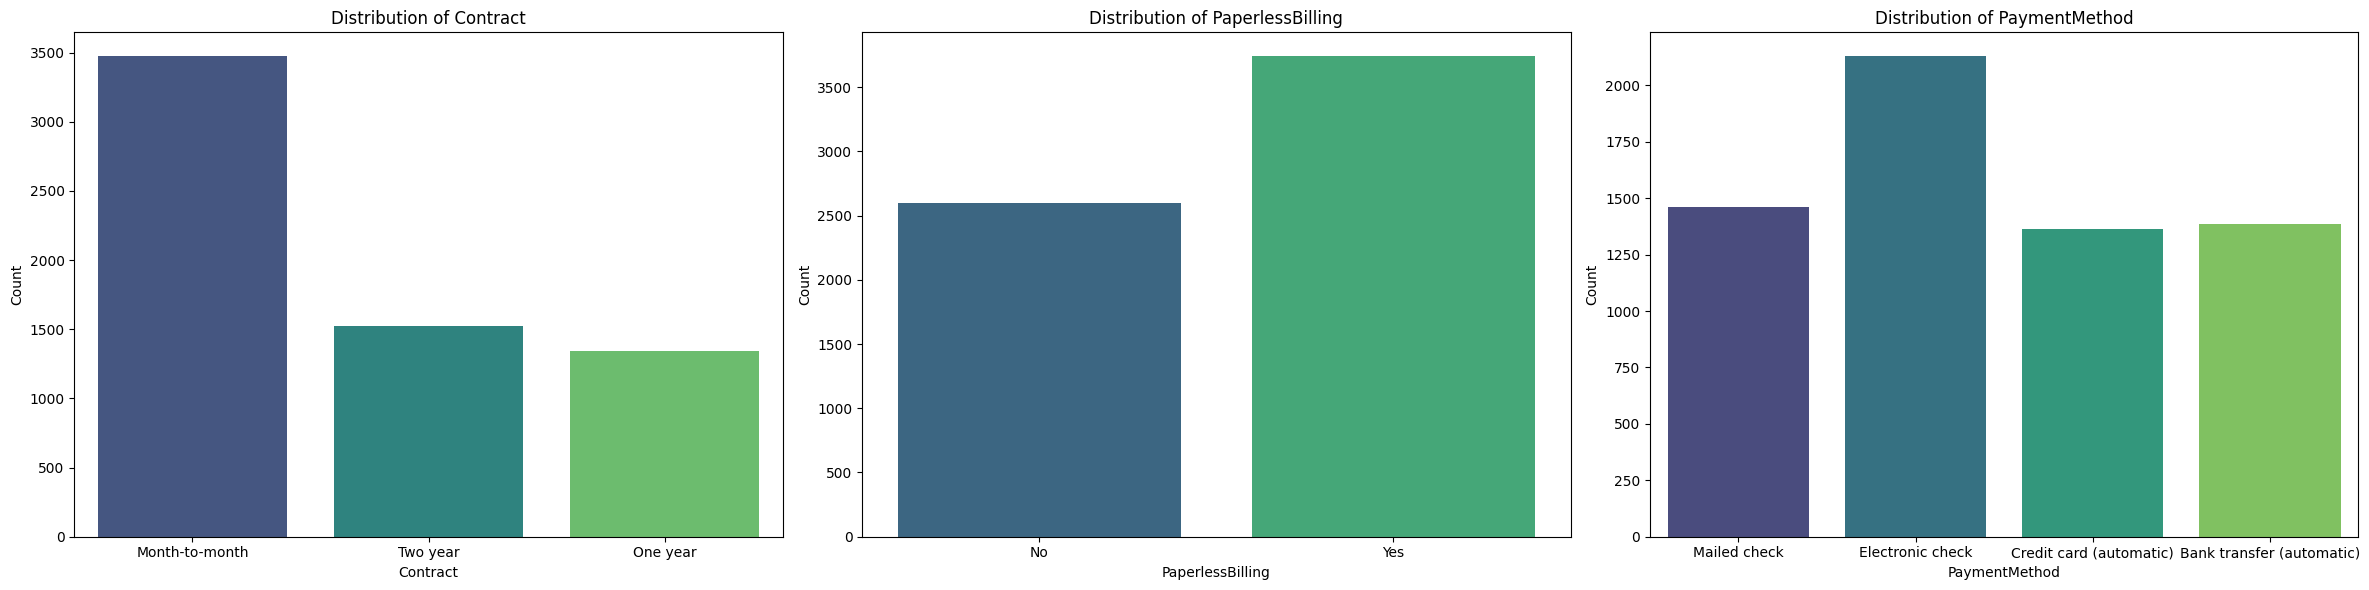

In [ ]:
# Plotting countplot for categorical attributes
categorical_attributes = data.select_dtypes(include='object').columns.drop(['customerID', 'TotalCharges','Churn'])

for i in range(0, len(categorical_attributes), 3):
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    for j, column in enumerate(categorical_attributes[i:i+3]):
        sns.countplot(data=data, x=column, hue=column, palette='viridis', ax=axes[j])
        axes[j].set_title(f'Distribution of {column}')
        axes[j].set_xlabel(column)
        axes[j].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

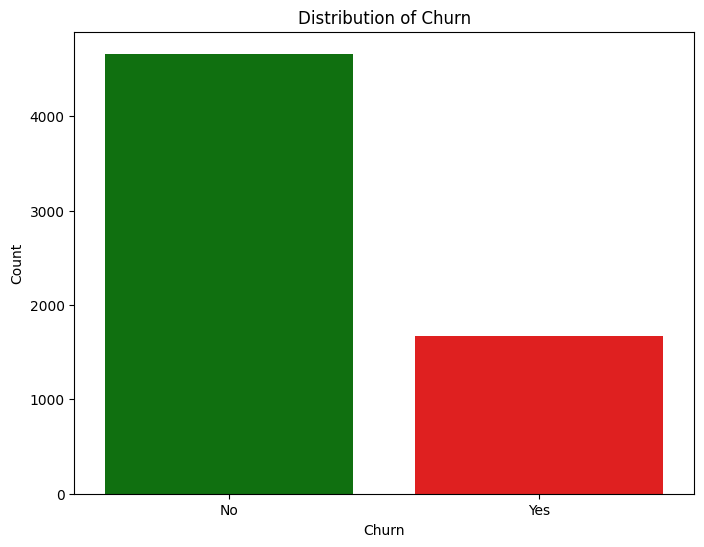

In [ ]:
# Plotting distribution of target feature - Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', hue = 'Churn', legend = False, palette={'No': 'green', 'Yes': 'red'})
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

It can be inferred that the dataset label is imbalanced meaning that it is not equally divided into 'Yes' and 'No'.


- **Explain noticeable traits for key attributes. Are there any attributes that might require
special treatment? If so, what special treatment might they require?**

TotalCharges and SeniorCitizen are the two key attributes that would require special treatment due to the nature of their distribtuon.

In [ ]:
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Convert SeniorCitizen to categorical
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

# Verify the data types after conversion
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


The above code converts TotalCharges, which was categorical in the first place into numerical, attributing to its continuous nature.
Moreover, we convert the SeniorCitizen column into a categorical attribute due to its binary nature.

- **Analyze and discuss the relationships between the data attributes, and between the data attributes and label.**

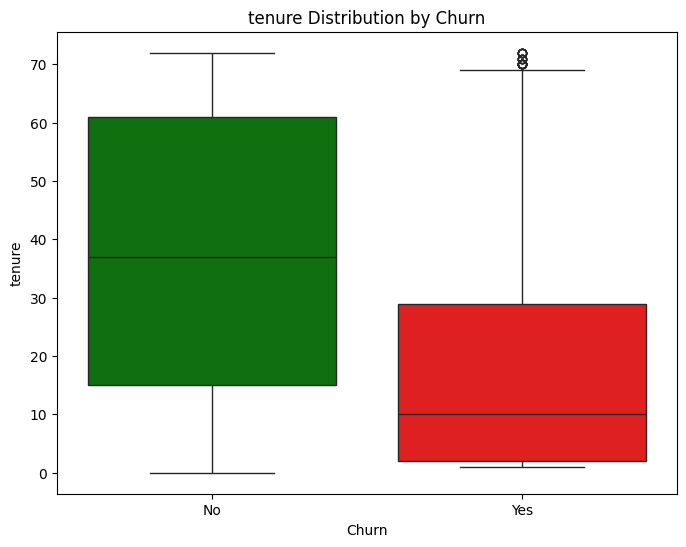

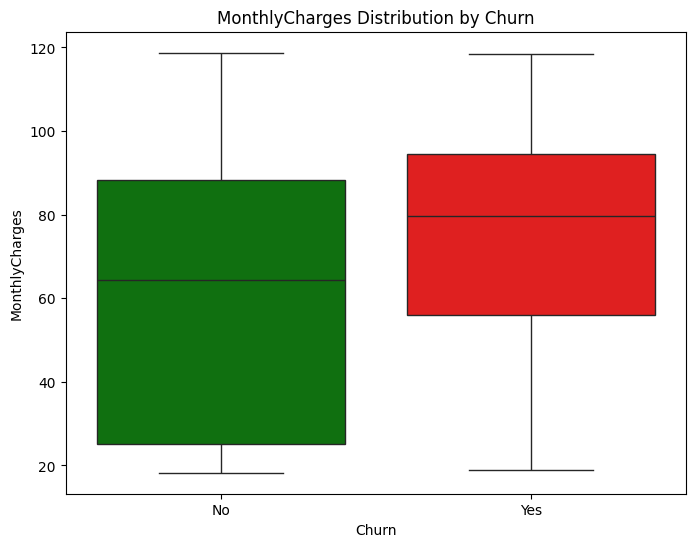

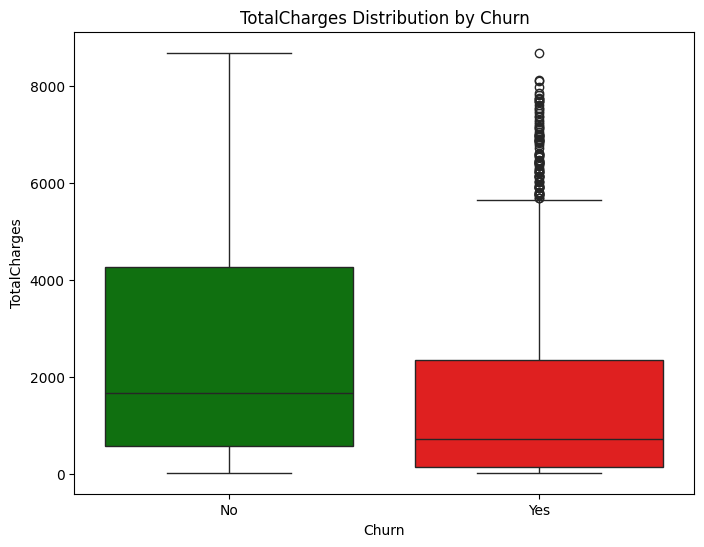

In [ ]:
numerical_attributes = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Analyze relationships between numerical attributes and churn label
for column in numerical_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Churn', hue = 'Churn', y=column, palette = {'No': 'green', 'Yes': 'red'})
    plt.title(f'{column} Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

From the box plots above, we can infer that TotalCharges has significant amount of outliers, whereas the columns tenure and MonthlyCharges are more normally distributed.

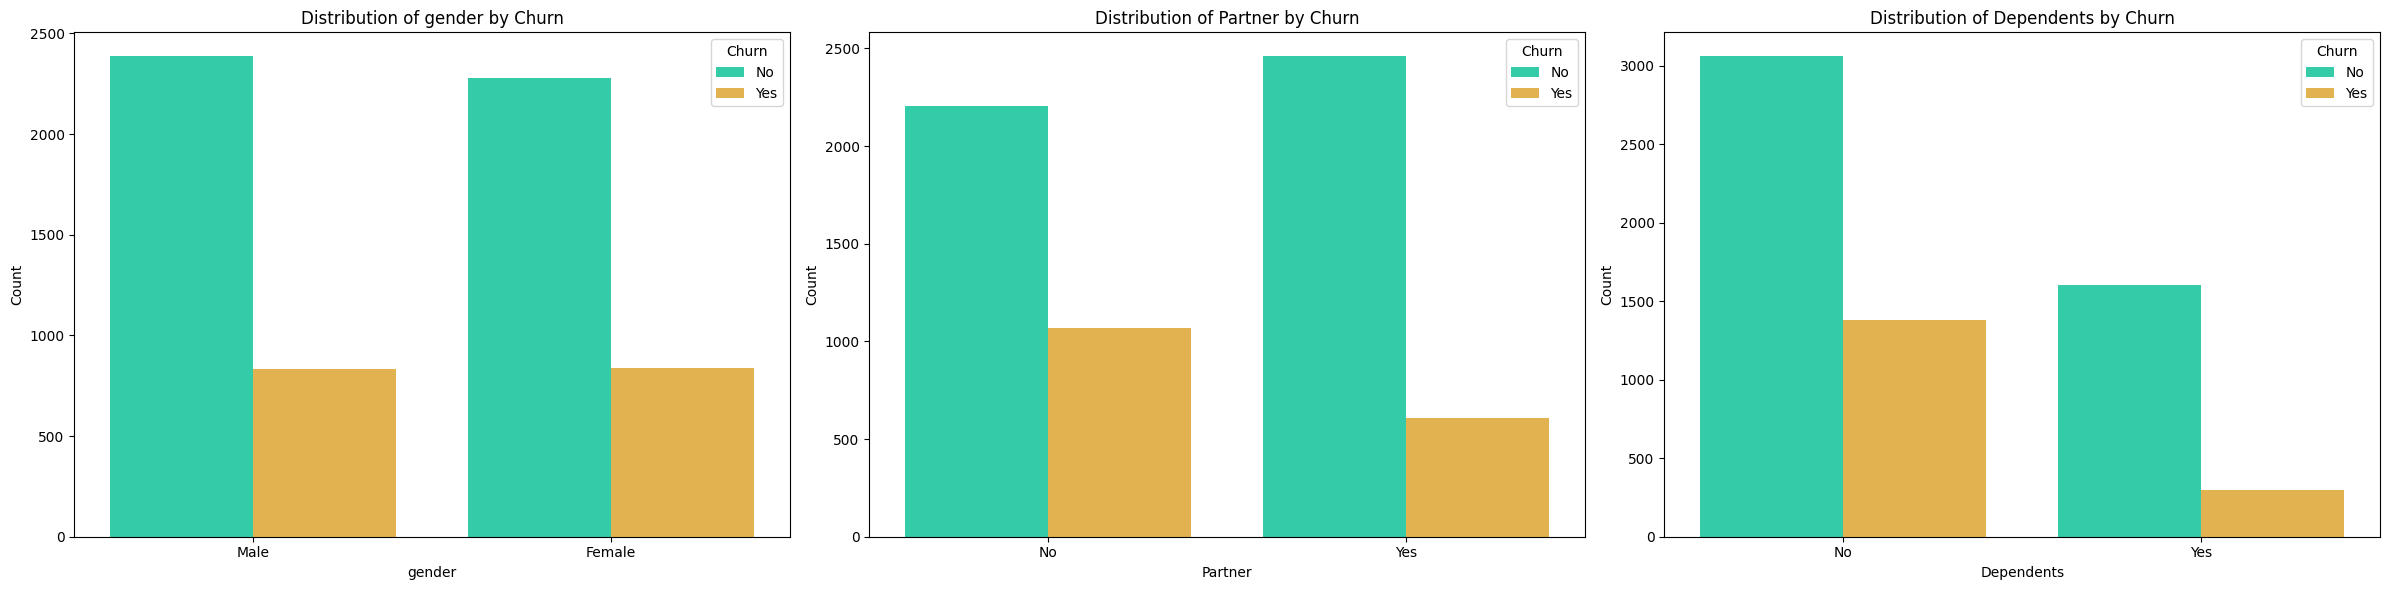

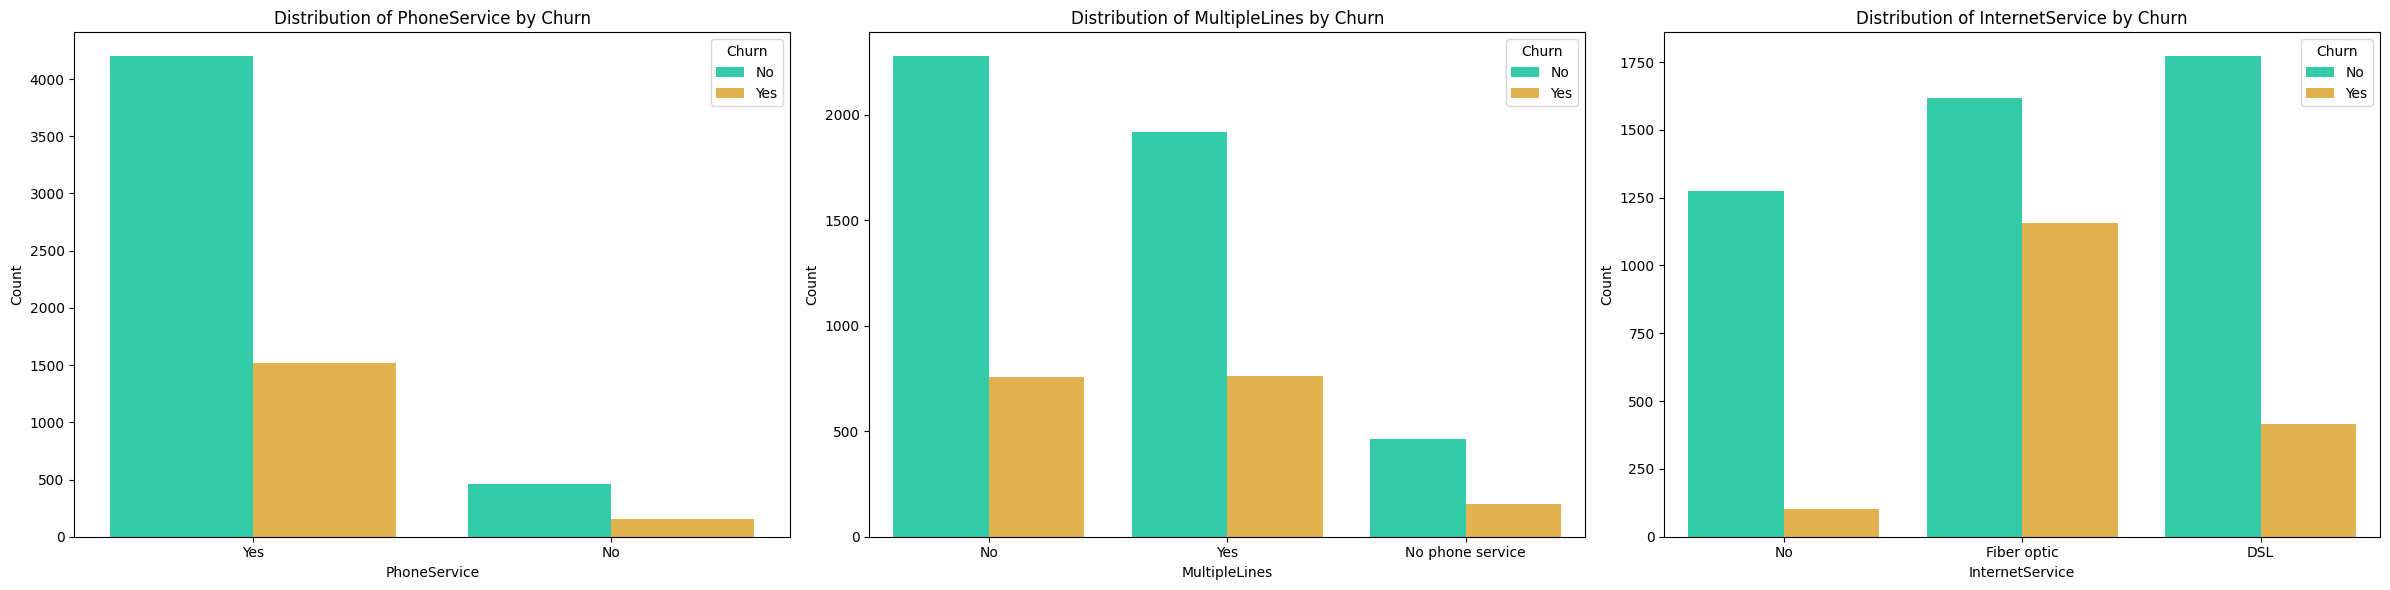

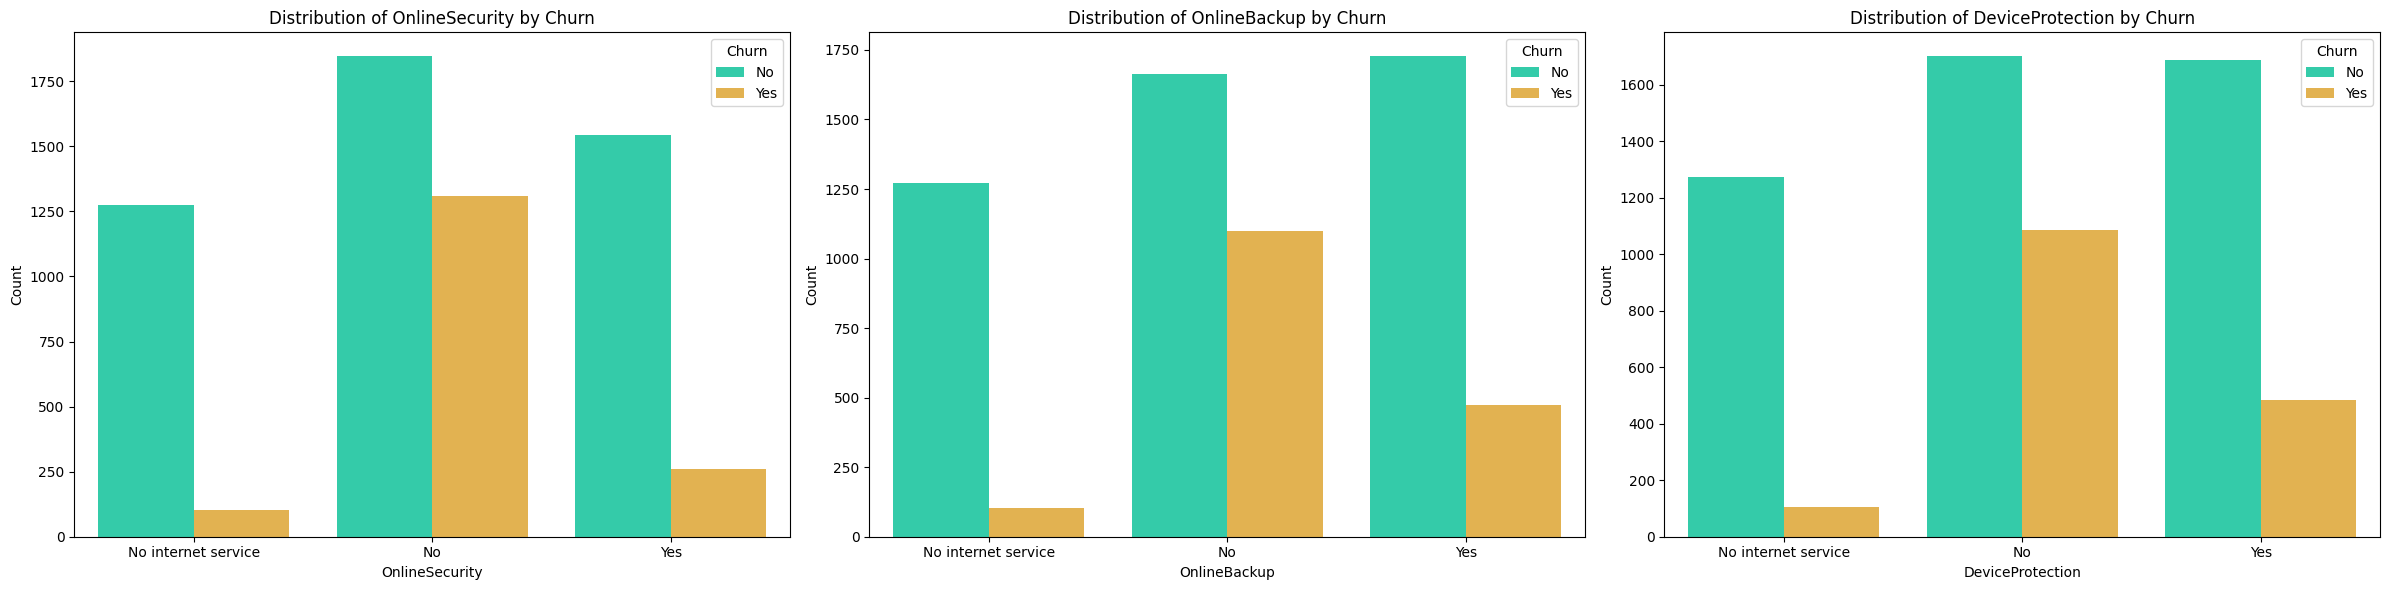

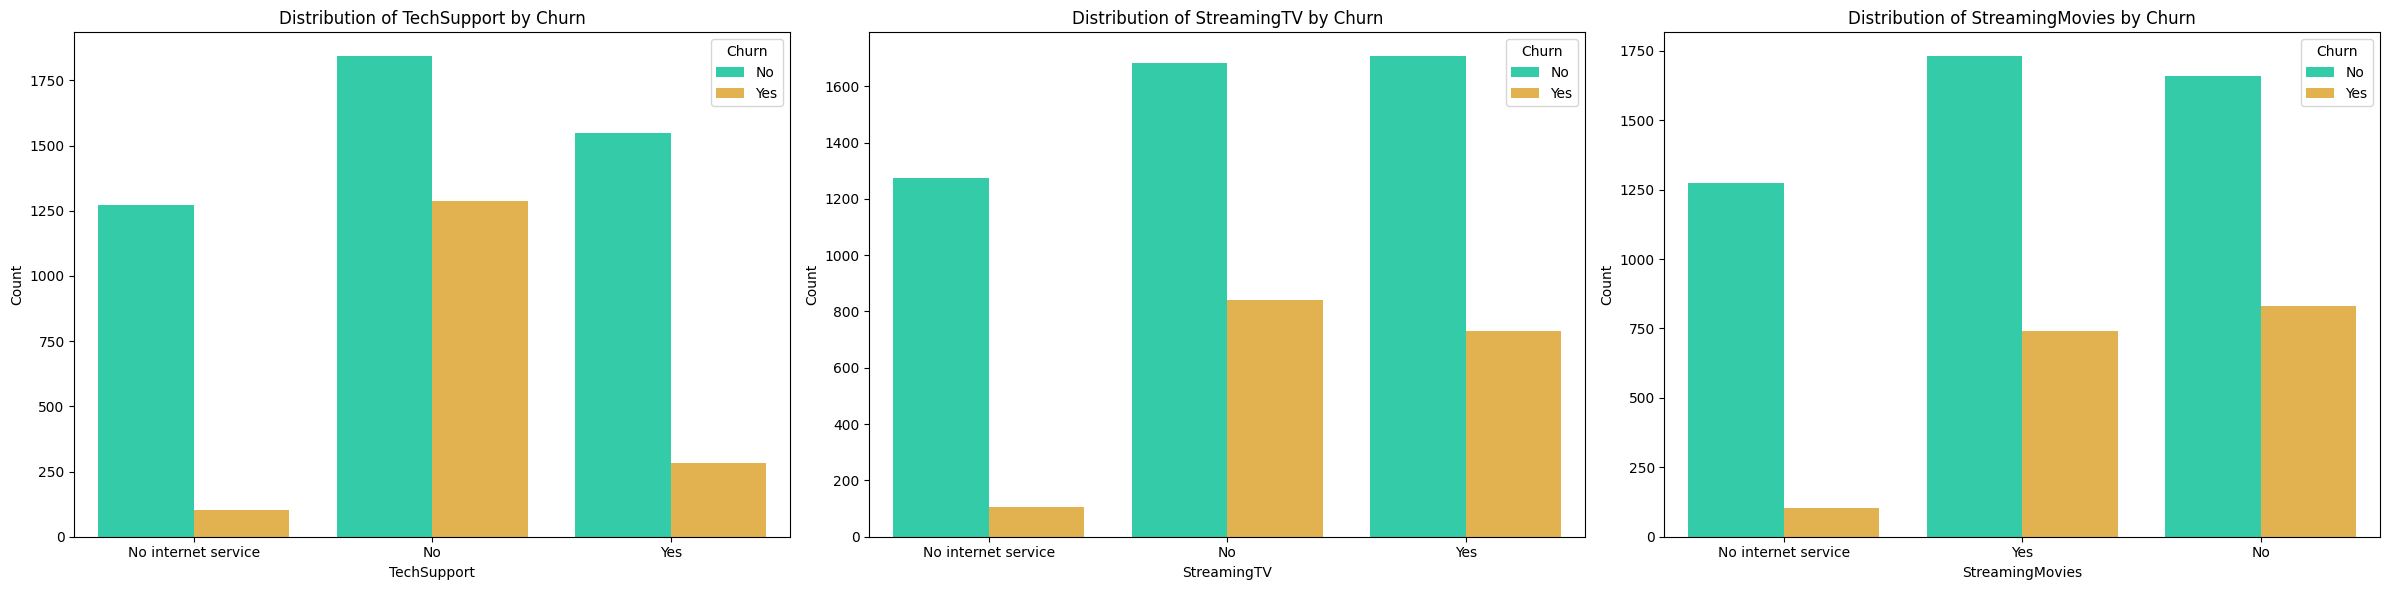

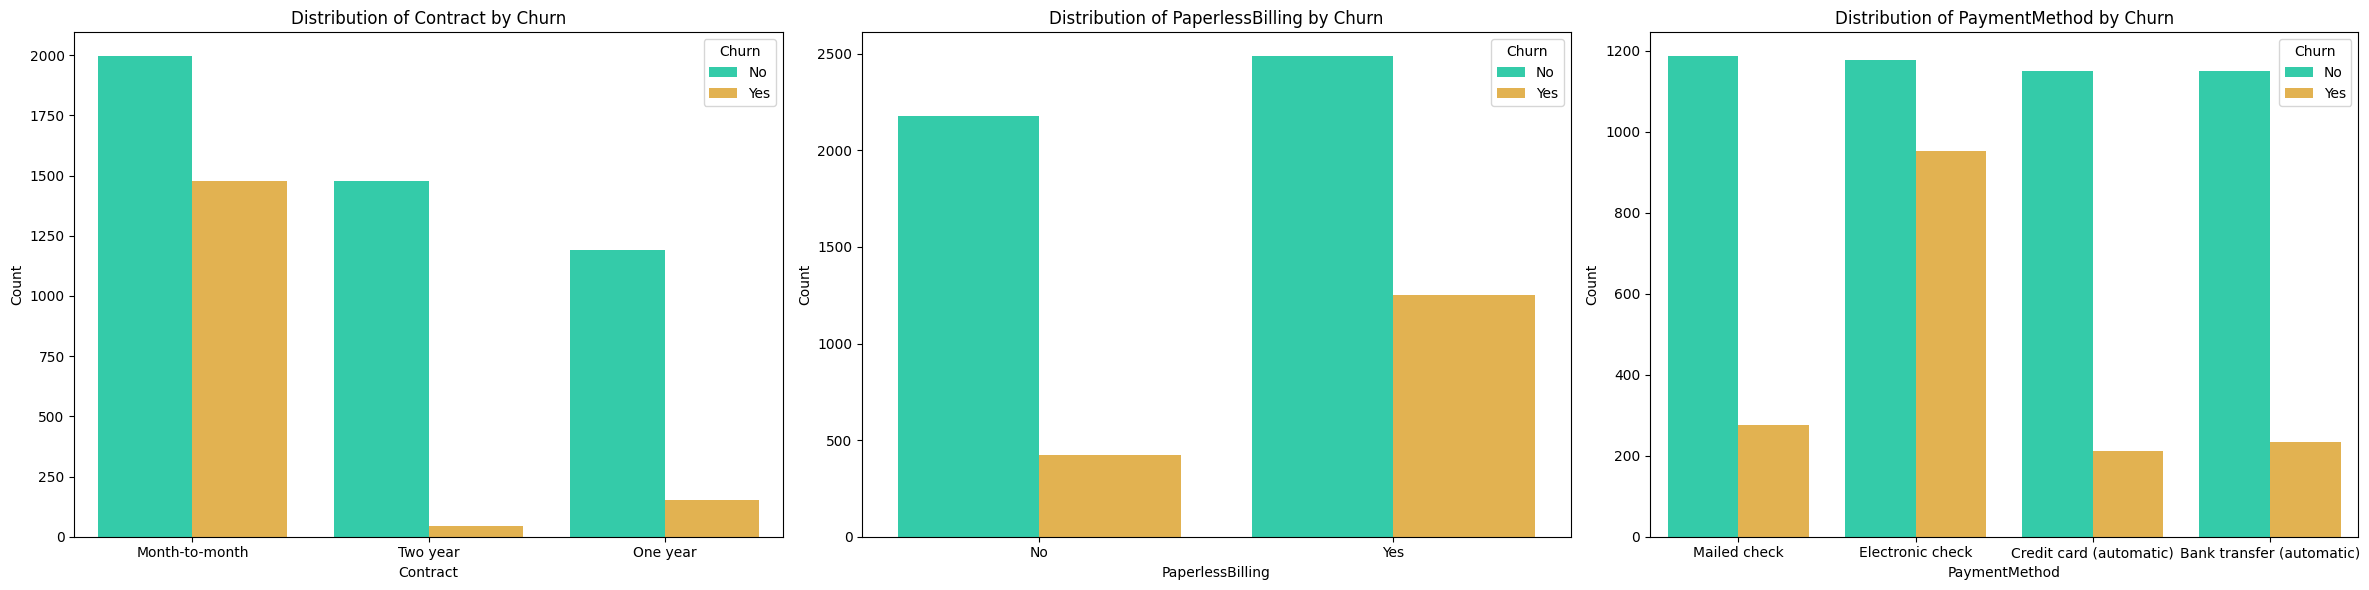

In [ ]:
# Analyze relationships between categorical attributes and churn label
for i in range(0, len(categorical_attributes), 3):
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    for j, column in enumerate(categorical_attributes[i:i+3]):
        sns.countplot(data=data, x=column, hue='Churn', palette='turbo', ax=axes[j])
        axes[j].set_title(f'Distribution of {column} by Churn')
        axes[j].set_xlabel(column)
        axes[j].set_ylabel('Count')
    plt.tight_layout()
    plt.show()


The above countplot distribution provides a comprehensive analysis of how categorical attributes are distributed with respect to the label 'Churn'.

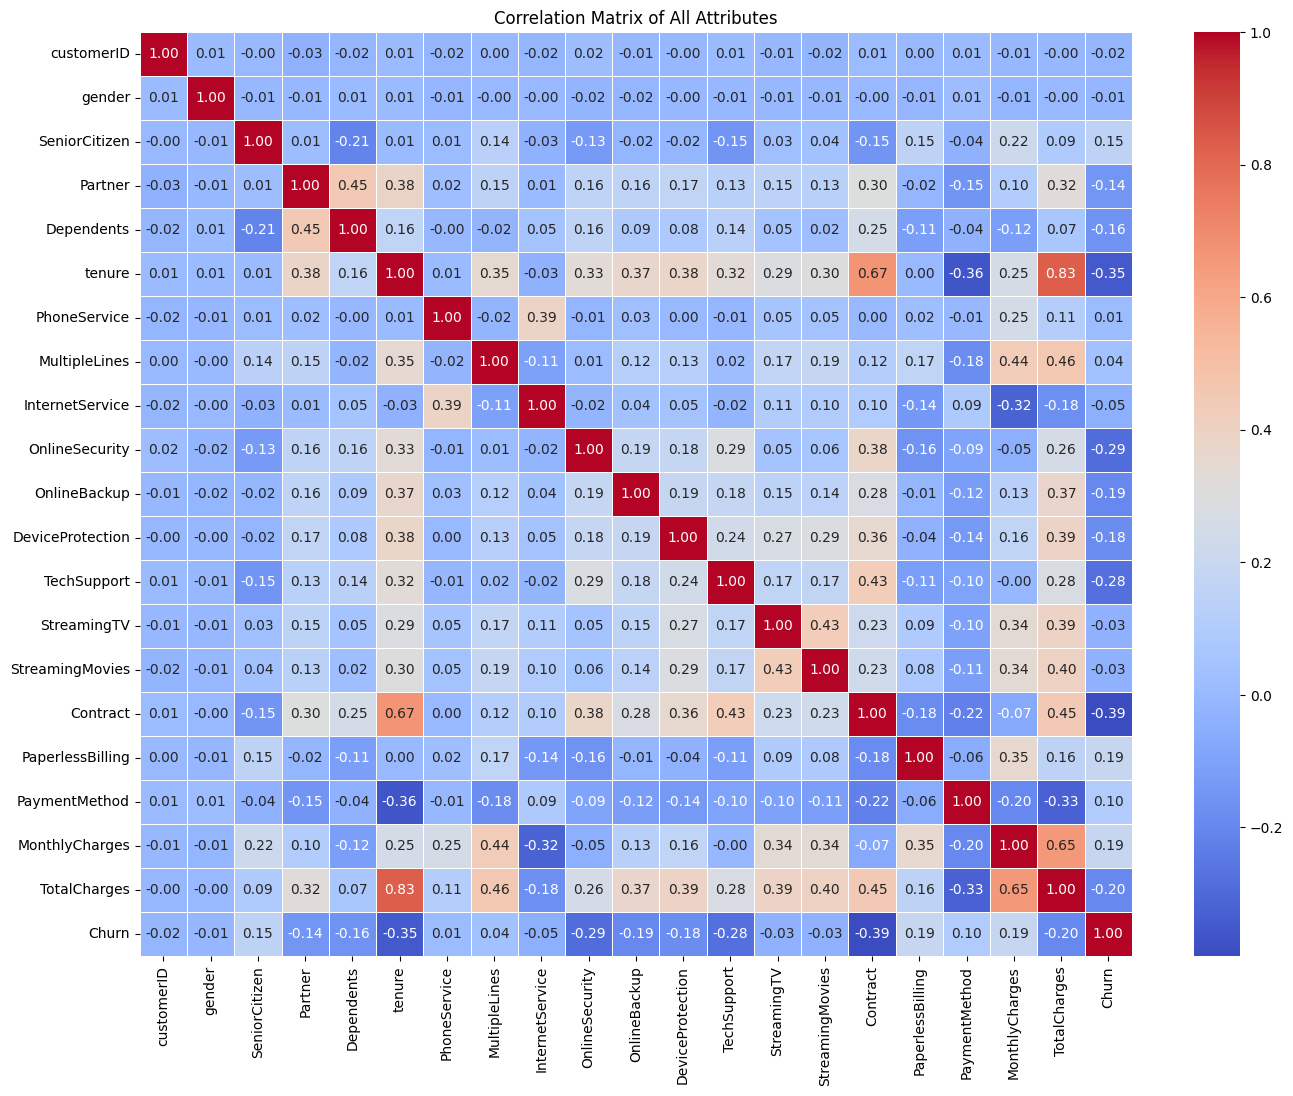

In [ ]:
data_encoded = data.copy()

categorical_attributes = data.select_dtypes(include='object')

# Label encode categorical attributes
label_encoder = LabelEncoder()
for column in categorical_attributes:
    data_encoded[column] = label_encoder.fit_transform(data[column])

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Attributes')
plt.show()

- By interpreting the above correlation matrix, we are able to analyse the relationships between the data attributes, and between the data attributes and the label.
- It can be found out that tenure and TotalCharges possess the highest possible correlation of 0.83.
- With respect to the Churn label, 'Contract' is found to have the most significant correlation of -0.39.

## Data Pre-processing & Feature Engineering
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.

Perform Feature Engineering on the dataset.

**Cleaning and preparing data for modeling is done through the following steps which would each be explained individually below:**

**1. Checking for null values**

In [ ]:
# Find missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Fill missing values for TotalCharges with the mean
mean_total_charges = data['TotalCharges'].mean()
data['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Verify missing values after filling
print("Missing values after filling:")
print(data.isnull().sum())


Missing values after filling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


- The first step involves identifying missing values in the dataset.
- The output shows the columns with missing values along with their respective counts.
- We successfully filled the missing values in the 'TotalCharges' column by the mean imputation method.
- This step is necessary to ensure the completeness of data.

**2. Label Encoding categorical attributes (Feature Engineering)**

In [ ]:
categorical_attributes = data.select_dtypes(include='object')

# Label encode categorical attributes
label_encoder = LabelEncoder()
for column in categorical_attributes:
    data[column] = label_encoder.fit_transform(data[column])

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5900,1,0,0,0,26,1,0,2,1,...,1,1,1,1,0,0,3,20.90,518.30,0
1,4246,0,0,0,0,1,1,0,2,1,...,1,1,1,1,0,0,3,19.90,19.90,0
2,4387,1,1,1,0,18,1,0,1,0,...,0,0,0,2,0,0,2,78.55,1422.65,1
3,5102,0,1,0,0,15,1,0,1,0,...,0,0,0,0,0,1,1,75.30,1147.45,1
4,2265,0,0,0,0,2,1,0,2,1,...,1,1,1,1,0,1,3,20.45,42.45,0


- The categorical attributes are identified and encoded using label encoding.
- This process converts categorical variables into numerical format, allowing machine learning algorithms to process them effectively.
- The encoded dataset is displayed to verify the transformation.



**3. Performing Statistical test - ANOVA (Feature Engineering)**

In [ ]:
# Split the dataset into features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Perform ANOVA
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Get the p-values from ANOVA
p_values = selector.pvalues_

# Print the p-values for each feature
for i, column in enumerate(X.columns):
    print(f'Feature: {column}, p-value: {p_values[i]}')

Feature: customerID, p-value: 0.19256794973971214
Feature: gender, p-value: 0.3547833527029163
Feature: SeniorCitizen, p-value: 2.291323195249818e-34
Feature: Partner, p-value: 6.433747489422066e-31
Feature: Dependents, p-value: 2.9811516023066244e-38
Feature: tenure, p-value: 2.011740277099208e-178
Feature: PhoneService, p-value: 0.43676832110848407
Feature: MultipleLines, p-value: 0.0027194812300894424
Feature: InternetService, p-value: 0.00015878785873259333
Feature: OnlineSecurity, p-value: 4.599570393799172e-121
Feature: OnlineBackup, p-value: 5.1746972676629026e-55
Feature: DeviceProtection, p-value: 1.368920784086899e-46
Feature: TechSupport, p-value: 5.7952413688651764e-111
Feature: StreamingTV, p-value: 0.00647973599575987
Feature: StreamingMovies, p-value: 0.006846909011237673
Feature: Contract, p-value: 1.1804561335717965e-234
Feature: PaperlessBilling, p-value: 1.1518181904976363e-53
Feature: PaymentMethod, p-value: 8.09786004407965e-16
Feature: MonthlyCharges, p-value: 2.6

- The dataset is split into features (X) and the target variable (y).
- ANOVA is performed to evaluate the statistical significance of each feature with respect to the target variable.
- The p-values for each feature are printed, indicating their level of significance in predicting the target variable (Churn).

**4. Eliminating columns based on ANOVA (Feature Engineering)**

In [ ]:
# Drop features with high p-values
high_p_value_features = X.columns[p_values > 0.05]
X = X.drop(columns=high_p_value_features)

A common threshold for significance is a p-value less than 0.05. Here are the features with relatively high p-values:

- customerID
- gender
- PhoneService

These features have p-values greater than 0.05 and may not be significantly related to the target variable (Churn). Therefore, we can consider dropping these features from the dataset.

**5. Eliminating columns based on correlation (Feature Engineering)**

In [ ]:
# Calculate correlations with Churn
correlations = data.corr()['Churn'].sort_values(ascending=False)

print("Correlations with Churn:")
print(correlations)

Correlations with Churn:
Churn               1.000000
PaperlessBilling    0.191958
MonthlyCharges      0.191290
SeniorCitizen       0.152685
PaymentMethod       0.100912
MultipleLines       0.037649
PhoneService        0.009770
gender             -0.011625
customerID         -0.016369
StreamingMovies    -0.033964
StreamingTV        -0.034194
InternetService    -0.047424
Partner            -0.144494
Dependents         -0.161401
DeviceProtection   -0.178617
OnlineBackup       -0.194389
TotalCharges       -0.195743
TechSupport        -0.275736
OnlineSecurity     -0.287709
tenure             -0.346667
Contract           -0.394180
Name: Churn, dtype: float64


- The correlations between each feature and the target variable (Churn) are calculated.
- Features with higher correlations are likely to have a stronger influence on churn prediction.
- The correlations are sorted in descending order to identify the most influential features.



In [ ]:
low_correlation_features = correlations[abs(correlations) < 0.1].index
data = data.drop(columns=low_correlation_features)

print("Remaining features after feature elimination:")
print(data.columns)

Remaining features after feature elimination:
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


- Features with low correlation coefficients (< 0.1 in absolute value) with the target variable are considered less impactful in predicting churn and thus features like 'MultipleLines', 'StreamingMovies', 'StreamingTV', 'InternetService' are dropped.
- These features are removed from the dataset to better fit the model and reduce overfitting.



**6. Data Sampling**

In [ ]:
X = data.drop(columns=['Churn'])

# Up Sampling the Data
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X,y)

- The dataset is upsampled using the SMOTEENN technique to address class imbalance in the target variable (Churn).
- This step ensures that the model is trained on a balanced dataset, leading to more accurate predictions for both churn and non-churn instances.



**7. Splitting the Dataset**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Display the preprocessed data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4192, 13)
X_test shape: (1048, 13)
y_train shape: (4192,)
y_test shape: (1048,)


- Finally, the dataset is split into training and testing sets to train and evaluate the model, respectively.
- The shapes of the training and testing data are displayed to analyse the splitting process.

## Modeling

Train at least three different classifier models (e.g., XGBoost, Random Forest, Decision Tree Classifier etc.) and optimize hyperparameters(Hint : GridsearchCV) to enhance performance.

Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report F1 score, Cross-validation score, Precision, Recall, Accuracy). Also, for each model, plot the ROC-AUC curve.

Then, combine your classifiers into an ensemble that outperforms each individual classifier. Describe and discuss your findings.


**Train at least three different classifier models (e.g., XGBoost, Random Forest, Decision Tree Classifier etc.) and optimize hyperparameters(GridsearchCV) to enhance performance.**

In [ ]:
# Define classifiers and parameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'n_estimators': [50, 100, 200],
                       'max_depth': [None, 5, 10],
                       'min_samples_split': [2, 5, 10]}),

    'Decision Tree': (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}),

    'XGBoost': (XGBClassifier(random_state=42),
                {'max_depth': [3, 5, 7],
                 'learning_rate': [0.01, 0.1, 0.3],
                 'n_estimators': [100, 200, 300]})
}

# Fit models and perform GridSearchCV
grid_search_results = {}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    grid_search_results[name] = grid_search

# Print best hyperparameters
for name, grid_search in grid_search_results.items():
    print("Best hyperparameters for", name + ":", grid_search.best_params_)

Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


- The above code defines three different classifier models: Random Forest, Decision Tree, and XGBoost.
- For each classifier, a set of hyperparameters is specified, and GridSearchCV is used to optimize these parameters for enhanced performance.
- After training and hyperparameter tuning, the output reveals the best combination of hyperparameters for each classifier.

The best parameters for each of the classifier include:


1.   **Random Forest**: 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200
2.   **Decision Tree**: 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2
3.   **XGBoost:** 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200


**Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report F1 score, Cross-validation score, Precision, Recall, Accuracy).**

In [ ]:
# Define evaluation metrics
evaluation_metrics = ['F1 Score', 'Cross-validation Score', 'Precision', 'Recall', 'Accuracy']

# Initialize results dictionary
results = {metric: {} for metric in evaluation_metrics}

# Calculate cross-validation scores for each classifier
for name, grid_search in grid_search_results.items():
    # Calculate cross-validation scores
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1')

    # Calculate mean cross-validation score
    cv_score_mean = cv_scores.mean()

    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_estimator.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results in the dictionary
    results['F1 Score'][name] = f1
    results['Cross-validation Score'][name] = cv_score_mean
    results['Precision'][name] = precision
    results['Recall'][name] = recall
    results['Accuracy'][name] = accuracy

# Print evaluation results
for metric, metric_results in results.items():
    print(metric + ":")
    for name, value in metric_results.items():
        print("  {}: {:.5f}".format(name, value))

F1 Score:
  Random Forest: 0.95247
  Decision Tree: 0.93856
  XGBoost: 0.96014
Cross-validation Score:
  Random Forest: 0.95333
  Decision Tree: 0.93757
  XGBoost: 0.95781
Precision:
  Random Forest: 0.94149
  Decision Tree: 0.92133
  XGBoost: 0.95841
Recall:
  Random Forest: 0.96370
  Decision Tree: 0.95644
  XGBoost: 0.96189
Accuracy:
  Random Forest: 0.94943
  Decision Tree: 0.93416
  XGBoost: 0.95802


- The above code defines a validation pipeline utilizing 5-fold cross-validation.
- It calculates cross-validation scores for each classifier using the best estimator obtained from GridSearchCV.
- Finally, it reports the evaluation metrics for each classifier, including F1 Score, Cross-validation Score, Precision, Recall, and Accuracy.

**Findings:**

1.   XGBoost yields the highest accuracy of 95.80%.
2.   Random Forest has a higher Cross-validation score than the rest of the classifiers.
3. However, XGBoost beats the other classifiers in terms of F1-Score, Precision and Recall.



**For each model, plot the ROC-AUC curve.**

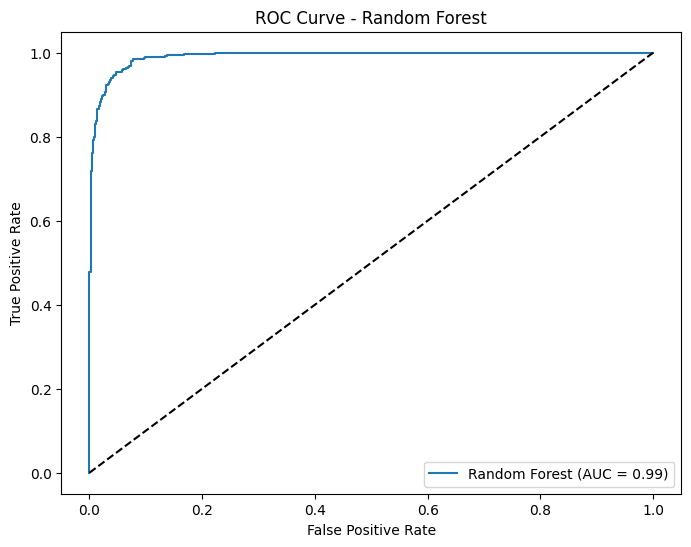

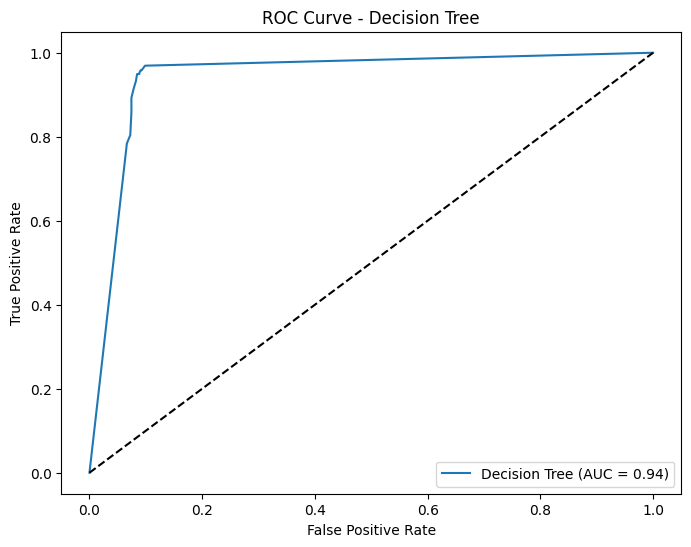

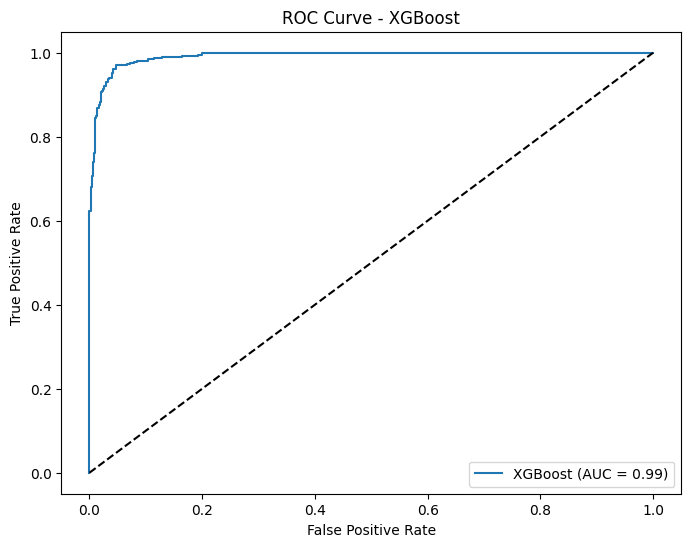

In [ ]:
# Iterate over each classifier and plot its ROC curve
for name, grid_search in grid_search_results.items():
    # Predict probabilities for positive class
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    # Calculate False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate AUC score
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()

- The above code iterates over each classifier trained using GridSearchCV and plots its ROC curve along with the corresponding AUC score.
- Each curve is labeled with the classifier's name and its corresponding AUC score.
- The ROC curve visualizes the trade-off between the true positive rate and the false positive rate, providing insight into the classifier's performance across different threshold values.
- The AUC score quantifies the classifier's ability to distinguish between positive and negative classes, with higher values indicating better performance.

**Findings:**

1. Random Forest : Achieved a high AUC score of 0.99, indicating excellent performance in classifying the data points.

2. Decision Tree : Yielded a slightly lower AUC score of 0.94 compared to Random Forest and XGBoost.

3. XGBoost : Attained a comparable AUC score of 0.99 to Random Forest, showcasing its effectiveness in classification tasks.

**Combine your classifiers into an ensemble that outperforms each individual classifier. Try it on the test set.**

In [ ]:
# Create a dictionary of classifiers
classifiers = {
    'Random Forest': grid_search_results['Random Forest'].best_estimator_,
    'Decision Tree': grid_search_results['Decision Tree'].best_estimator_,
    'XGBoost': grid_search_results['XGBoost'].best_estimator_
}

# Define the voting ensemble
voting_ensemble = VotingClassifier(estimators=list(classifiers.items()))

# Define hyperparameters for GridSearchCV
param_grid_voting = {
    'voting': ['soft', 'hard'],  # Voting strategy
}

# Perform GridSearchCV to optimize hyperparameters
grid_voting = GridSearchCV(estimator=voting_ensemble, param_grid=param_grid_voting, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_voting.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_voting.best_params_
best_score = grid_voting.best_score_

# Print the best parameters and the best score
print("Best parameters for the voting ensemble:", best_params)
print("Best accuracy score for the voting ensemble:", best_score)

Best parameters for the voting ensemble: {'voting': 'hard'}
Best accuracy score for the voting ensemble: 0.9518104573861941


- The above code combines the optimized classifiers into a voting ensemble, leveraging GridSearchCV to fine-tune hyperparameters.

- By selecting the 'hard' voting strategy, where the final prediction is determined by a simple majority vote, the ensemble achieves a notable accuracy score of around 95.18% on the training data.








## Evaluation and Reporting

**Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions.**


In [ ]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 200, random_state = 42)

# Train the Random Forest classifier on the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions on unseen data:")
print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Predictions on unseen data:
[1 1 0 ... 0 1 1]
Accuracy on test data: 0.9580152671755725


- The XGBoost classifier, trained with a learning rate of 0.1, maximum depth of 7, and 200 estimators, demonstrates promising performance on the unseen test data, achieving an accuracy of approximately 95.80%.

- Therefore, based on the high accuracy achieved, we can conclude that the XGBoost model is well-suited for this classification task and can effectively predict whether customers will churn or not.

In [ ]:
# Predict labels for the entire test set
y_pred_test = model.predict(X_test)

# Predict labels for the entire training set
y_pred_train = model.predict(X_train)

# Print predicted labels for test data along with actual labels
print("Predicted Labels vs. Actual Labels for Test Data:")
for i, (predicted_label, actual_label) in enumerate(zip(y_pred_test[:5], y_test[:5]), 1):
    print(f"Test Sample {i}: Predicted Label = {predicted_label}, Actual Label = {actual_label}")

# Print predicted labels for train data along with actual labels
print("\nPredicted Labels vs. Actual Labels for Train Data:")
for i, (predicted_label, actual_label) in enumerate(zip(y_pred_train[:5], y_train[:5]), 1):
    print(f"Train Sample {i}: Predicted Label = {predicted_label}, Actual Label = {actual_label}")

Predicted Labels vs. Actual Labels for Test Data:
Test Sample 1: Predicted Label = 1, Actual Label = 1
Test Sample 2: Predicted Label = 1, Actual Label = 1
Test Sample 3: Predicted Label = 0, Actual Label = 0
Test Sample 4: Predicted Label = 1, Actual Label = 1
Test Sample 5: Predicted Label = 0, Actual Label = 0

Predicted Labels vs. Actual Labels for Train Data:
Train Sample 1: Predicted Label = 0, Actual Label = 0
Train Sample 2: Predicted Label = 0, Actual Label = 0
Train Sample 3: Predicted Label = 0, Actual Label = 0
Train Sample 4: Predicted Label = 1, Actual Label = 1
Train Sample 5: Predicted Label = 0, Actual Label = 0


- The predicted labels for both the test and train datasets are compared with the actual labels.
- These results indicate that the model performs well on both the training and test datasets, and is effective in predicting customer churn.